## Business Objectives 
Lending club is online loan approver, which review and arrange loans and financing assisantance. Borrowers can access easy with lower interest rate by web portal.Objectives is explore the data and indetify the driving factor for likely to be loan default. recommend the finding variable/factor as a strong indicator to be defaulter. Company can utilize on predict for risk assessment. 

Case study by Khaleel & SaiSrinivas


## Load Library and Data file to explore the Insight

In [1]:
#Load the libraryss
import pandas as pd #To work with dataset
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

import matplotlib as mpl
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

## Building the dataset from given source CSV file

In [2]:
data = pd.read_csv('loan\loan.csv',index_col=False, dtype='unicode')

# Review dataset insight

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [4]:
data.shape

(39717, 111)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


<AxesSubplot:>

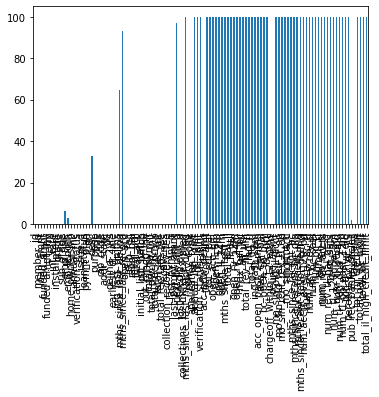

In [7]:
((data.isna().sum()/data.shape[0])*100).plot(kind='bar')

### Data Cleaning Process
#take row & columns to data analysis. Rest null rows and columns can be drop.
#fix missing values with operatorable value i.e. Zero



In [8]:
#Check the number of null values in the columns
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
#Drop the columns, which is gt than 25000 null values
data_NULL = data[data.columns[data.isnull().sum() > 25000]]
data_NULL.shape

(39717, 57)

In [10]:
#Check the shape of the dataframe
data_NULL.head()

,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,NaN,Jun-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#lets drop the column from data contains null more than 25000 rows
data = data.drop(data_NULL, axis=1)


In [12]:
data.shape

(39717, 54)

In [13]:
# still processing to find any null after cleaning of columns > 25000
data.columns[data.isnull().any()].tolist()  #data.columns[data.isna().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [14]:
#check one coulmn
data['emp_title'][data['emp_title'].isnull()]

0        NaN
2        NaN
8        NaN
30       NaN
42       NaN
        ... 
39700    NaN
39704    NaN
39706    NaN
39714    NaN
39715    NaN
Name: emp_title, Length: 2459, dtype: object

In [15]:
#fill all nan at data set with 0 value.
data.fillna(0,inplace=True)
data.emp_length.replace(['n/a'],0,inplace=True)

<AxesSubplot:>

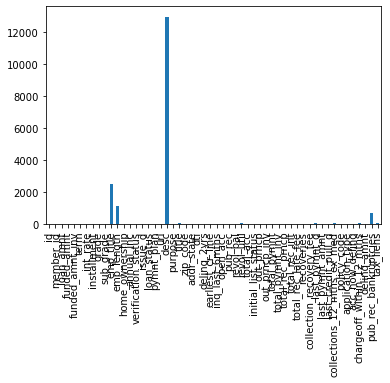

In [16]:
#Check zero values 
(data == 0).sum().plot(kind='bar')

In [17]:
try:
    data = data.drop(['desc'], axis=1)
except:
    print("desc_column - Already dropped")
data.shape  

(39717, 53)

In [18]:
## cleaning rows - Remove loan status in current
data.drop(data[data['loan_status'] == 'Current'].index, inplace = True)
data.shape  

(38577, 53)

## Identify Categorical Columns
Count of no of unique values in the column

In [19]:
# to indetify the unique values in columns to use for categorical
#data_chargeoff_unique_count_data = []
#for values in data_chargeoff.columns.tolist():
    #data_chargeoff_unique_count_data.append({'header': values, 'counts': len(data_chargeoff[values].unique())})

In [20]:
#data_chargeoff_unique_count = pd.DataFrame(data_chargeoff_unique_count_data).sort_values('counts',ascending = True)

In [21]:
#data_chargeoff_unique_count.head(5)

## Build derived columns from existing values

In [22]:
#data_chargeoff.info()
def clean_emplen(val):
    #return int(val.replace("year","").replace("years","").replace("+",""))
    return str(val.replace("+ years","").replace(" years","").replace(" year","").replace("< ",""))

In [23]:
try:
    data.int_rate = data.int_rate.apply(lambda x: x.replace("%","")).astype("float64")
except:
    print ("Processed already!")
    
#data.int_rate
try:
    data.term = data.term.apply(lambda x: x.replace(" months","")).astype("int")
except:
    print ("Processed already!")    
#data.term

try:
    data.emp_length = data.emp_length.apply(lambda x: x if type(x) != str else clean_emplen(x))
except:
    print ("Processed already!")      
#data.emp_length

In [24]:
data = data[-(data['last_pymnt_d'] == "")]
data = data[-data['last_pymnt_d'].isnull()]
data = data[-(data['earliest_cr_line'] == "")]
data.shape

(38577, 53)

In [25]:
#data[data['last_pymnt_d'].isna()]
#data.to_excel("output.xlsx") 
#data.info()

In [26]:
#data['issue_d_month'] = pd.to_datetime(data['issue_d']).dt.month
from datetime import datetime
data['issue_d_month']  = data['issue_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.month
data['issue_d_year']  = data['issue_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.year


#data['last_pymnt_d_month']  = data['last_pymnt_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.month
#data['last_pymnt_d_year']  = data['last_pymnt_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.year

#data['earliest_cr_line_month']  = data['earliest_cr_line'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.month
#data['earliest_cr_line_year']  = data['earliest_cr_line'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.year

#data.head()

## Change datatype to most processable data type

In [27]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'emp_length' ]
data[columns] = data[columns].astype(np.float64)

In [28]:
#data.head()
#data.info()

In [29]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_month,issue_d_year
0,1077501,1296599,"5,000.00","5,000.00","4,975.00",36,10.65,162.87,B,B2,0,10.00,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,"13,648.00",83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0,12,2011
1,1077430,1314167,"2,500.00","2,500.00","2,500.00",60,15.27,59.83,C,C4,Ryder,1.00,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,"1,687.00",9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0,12,2011
2,1077175,1313524,"2,400.00","2,400.00","2,400.00",36,15.96,84.33,C,C5,0,10.00,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,"2,956.00",98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0,12,2011
3,1076863,1277178,"10,000.00","10,000.00","10,000.00",36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.00,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,"5,598.00",21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0,12,2011
5,1075269,1311441,"5,000.00","5,000.00","5,000.00",36,7.90,156.46,A,A4,Veolia Transportaton,3.00,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,"7,963.00",28.30%,12,f,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0,1,INDIVIDUAL,0,0,0,0,0,12,2011


In [30]:
drop_columns = ["collections_12_mths_ex_med", "acc_now_delinq", "policy_code","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies","tax_liens"]

In [31]:
try:
    data = data.drop(drop_columns, axis=1)
except:
    print("Already dropped")
data.shape

(38577, 48)

In [32]:
data_chargeoff = data[data['loan_status'] == 'Charged Off']
data_chargeoff.shape

(5627, 48)

In [33]:
data.groupby(['loan_status'])['funded_amnt_inv'].sum()

loan_status
Charged Off    61,134,661.49
Fully Paid    333,217,992.81
Name: funded_amnt_inv, dtype: float64

In [34]:
data_fullypaid = data[data['loan_status'] == 'Fully Paid']
data_fullypaid.shape

(32950, 48)

In [35]:
data_chargeoff.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,issue_d_month,issue_d_year
1,1077430,1314167,"2,500.00","2,500.00","2,500.00",60,15.27,59.83,C,C4,Ryder,1.00,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,"1,687.00",9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,12,2011
8,1071795,1306957,"5,600.00","5,600.00","5,600.00",60,21.28,152.39,F,F2,0,4.00,OWN,"40,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,"5,210.00",32.60%,13,f,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,INDIVIDUAL,12,2011
9,1071570,1306721,"5,375.00","5,375.00","5,350.00",60,12.69,121.45,B,B5,Starbucks,1.00,RENT,"15,000.00",Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,"9,279.00",36.50%,3,f,0.00,0.00,"1,476.19","1,469.34",673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,INDIVIDUAL,12,2011
12,1064687,1298717,"9,000.00","9,000.00","9,000.00",36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,1.00,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,"10,452.00",91.70%,9,f,0.00,0.00,"2,270.70","2,270.70","1,256.14",570.26,0.00,444.30,4.16,Jul-12,305.38,Nov-12,INDIVIDUAL,12,2011
14,1069057,1303503,"10,000.00","10,000.00","10,000.00",36,10.65,325.74,B,B2,SFMTA,3.00,RENT,"100,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other Loan,951xx,CA,7.06,0,May-91,2,14,0,"11,997.00",55.50%,29,f,0.00,0.00,"7,471.99","7,471.99","5,433.47","1,393.42",0.00,645.10,6.31,Oct-13,325.74,Mar-14,INDIVIDUAL,12,2011


# Analysis - Data visualization insight

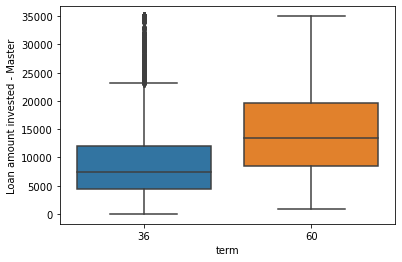

In [37]:
sns.boxplot( y="funded_amnt_inv", x='term' , data=data)
plt.ylabel('Loan amount invested - Master')
plt.show()

# overall funded sum of amount VS term

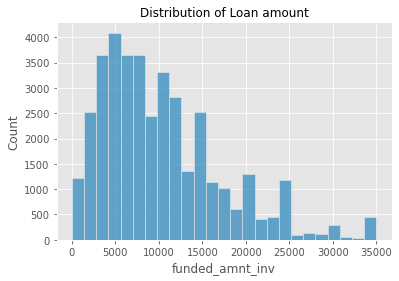

In [38]:
plt.style.use("ggplot")
sns.histplot(data.funded_amnt_inv, bins=25)
plt.title("Distribution of Loan amount", fontsize=12)
plt.show()

In [39]:
#remove outliner for term 36 > 25000 loan invested from Master
data.drop(data[(data['funded_amnt_inv'] > 25000) & (data['term'] == 36)].index, inplace = True)
data.shape

(38185, 48)

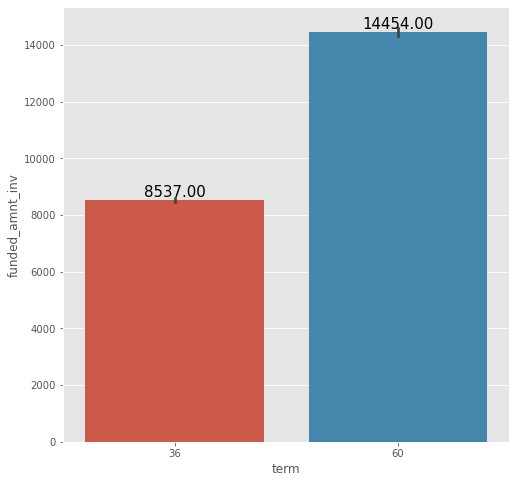

In [40]:
plt.figure(figsize=(8, 8))
plots = sns.barplot(x="term", y="funded_amnt_inv", data=data)
for bar in plots.patches:
    plots.annotate(format(bar.get_height().round(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center', 
               size=15, xytext=(0, 8),textcoords='offset points')


<AxesSubplot:title={'center':'Total amount Invested VS Loan Status - Leads for Loss'}, ylabel='funded_amnt_inv'>

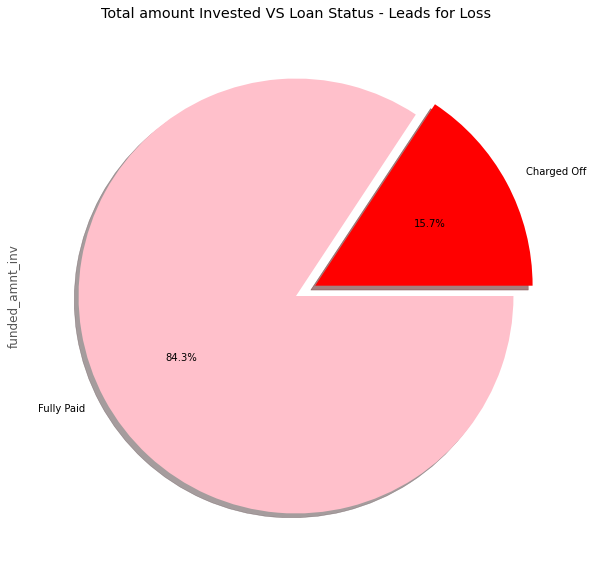

In [41]:
data.groupby(['loan_status'])['funded_amnt_inv'].sum().plot.pie(y='status', title="Total amount Invested VS Loan Status - Leads for Loss", legend=False, \
                   autopct='%1.1f%%', explode=(0.1,0), \
                   shadow=True, startangle=0, figsize=(10,10),colors = ['red', 'pink'] )

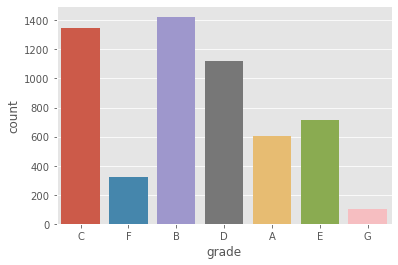

In [68]:
# Grade B & C are likey factor for defaulter 
sns.countplot(x='grade', data=data_chargeoff)
plt.show()

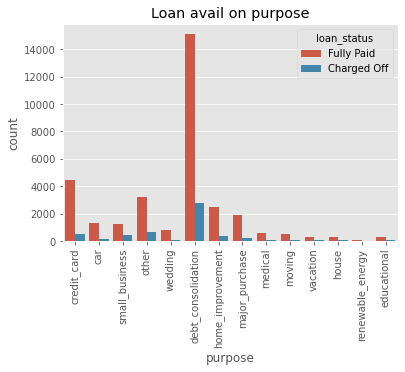

In [43]:
# Compare Loan VS purpose. Debt consolidation is likely influencing factor for defaulter
sns.countplot(x='purpose', hue='loan_status', data=data)
plt.title('Loan avail on purpose')
plt.xticks(rotation=90)
plt.show()

In [52]:
#Dropping None & Others from home owenership, to compate home owenership VS loan status analysis 
Data_ByHomeOwn = data[data['home_ownership'].isin(['RENT','MORTGAGE','OWN'])]

<AxesSubplot:xlabel='home_ownership'>

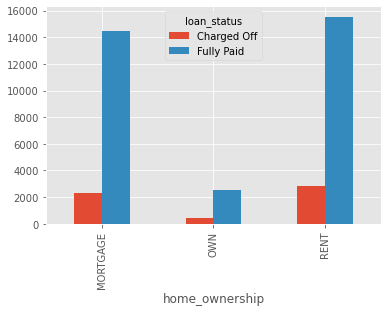

In [53]:
# Home is likely influencing factor for defaulter.

Data_ByHomeOwn.groupby('home_ownership').loan_status.value_counts().unstack().plot(kind='bar')

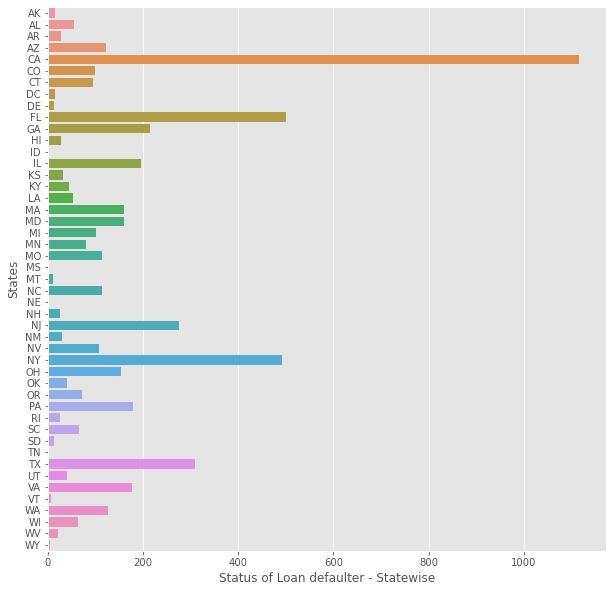

In [63]:
# Compare state vs defaulter... State is likely influencing major factor for defaulter

Data_ByState = data[data['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Status of Loan defaulter - Statewise')
plt.ylabel('States')
plt.show()

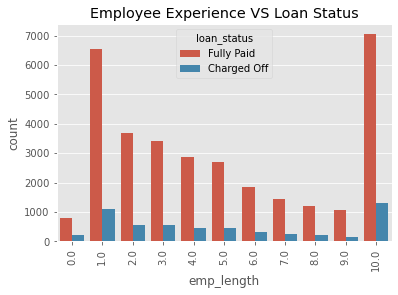

In [70]:
# Compare Loan VS emp length. Debt consolidation is likely influencing factor for defaulter
sns.countplot(x='emp_length', hue='loan_status', data=data)
plt.title('Employee Experience VS Loan Status')
plt.xticks(rotation=90)
plt.show()

In [78]:
data.annual_inc.describe()

count      38,185.00
mean       68,084.09
std        63,484.55
min         4,000.00
25%        40,000.00
50%        58,000.00
75%        81,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

In [90]:
data_byIncome = data.groupby('loan_status').annual_inc.sum()

loan_status
Charged Off     347,192,182.99
Fully Paid    2,252,598,652.09
Name: annual_inc, dtype: float64